#### author: Dinh Dang Khoa Tran
# DATA EXPLORATION

- Data check to perform
- Exploratory data analysis
- Data Pre-processing
- Visualization
- Model training
- Choose the best model

### Set up framework and read dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
print(os.getcwd())


/Users/khoatran/coding/ML/pp #2/notebooks


In [4]:
os.chdir('/Users/khoatran/coding/ML/pp #2')

In [5]:
df = pd.read_csv('data/raw.csv')

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Dataset information
- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

### Problem statement:
- EDA the dataset and based on it create a model that predict if a transaction is fraud or not

## Data Check and Cleaning

In [9]:
df.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [10]:
df.duplicated().any()

False

In [11]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

### Data Type Check

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features= [feature for feature in df.columns if df[feature].dtype == 'O']

In [14]:
#analysis cat_features
for feature in cat_features:
    print(feature, ": ", df[feature].unique())
    

type :  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig :  ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
nameDest :  ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [15]:
#isFraud and isFlaggedFraud also can be seen as categorical values 
#since isFraud and isFlaggedFraud no need to encode let say at the moment they are numerical
print("There are {} numerical features: ".format(len(numeric_features)))
print(numeric_features)
print("There are {} categorical features: ".format(len(cat_features)))
print(cat_features)


There are 8 numerical features: 
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
There are 3 categorical features: 
['type', 'nameOrig', 'nameDest']


In [16]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Statistic describe
#### amount (the amount of transaction):
- mean: ~179,862 (the size of transaction)
- std: ~603,858, showing high variability in transaction amounts.
#### balance (both 4 of them)
- std: range from ~288k to ~367k: The standard deviations are very large, especially for oldbalanceDest and newbalanceDest, indicating a wide range of account balances.
- 25%: ~0: 25% of these example have 0 balance in acount -> should be check to understand more the circumstance here
#### isFraud and isFlaggedFraud
- 75% or more of the samples is not Fraud or FlaggedFraud
- more detailed: around 0.13% of transactions isFraud and around 0.00025% of them isFlaggedFraud
#### ->  the flagging system misses a lot of fraudulent transactions.

In [17]:
fraud_count = (df['isFraud'] == 1).sum()


In [18]:
print(fraud_count)

8213


In [19]:
flaggedfraud_count = (df['isFlaggedFraud'] == 1).sum()
print(flaggedfraud_count)

16


In [20]:
#let see how many of them is flag true
fraud_flagged = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)]
fraud_flagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


I think the common factor here is the transaction to a 0 account balance but desoldbalance and desnewbalance is all 0 and all of them fail to transfer

In [21]:
fraud_flagged_false = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)]
fraud_flagged_false

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [22]:
fraud_flagged_false2 = df[(df['isFraud'] == 0) & (df['isFlaggedFraud'] == 1)]
fraud_flagged_false2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


-> none of sample was flagged wrong 

-> in general, there are a lot of fraud transaction that were not flagged (most of them), i can see on top of fraud_flagged_false that the transaction transfer to other account and then cash_out -> the flagged system cannot recognise it

## DATA VISUALIZATION

### class distribution

Text(0.5, 1.0, 'Class Distribution: Fraud vs. Non-Fraud')

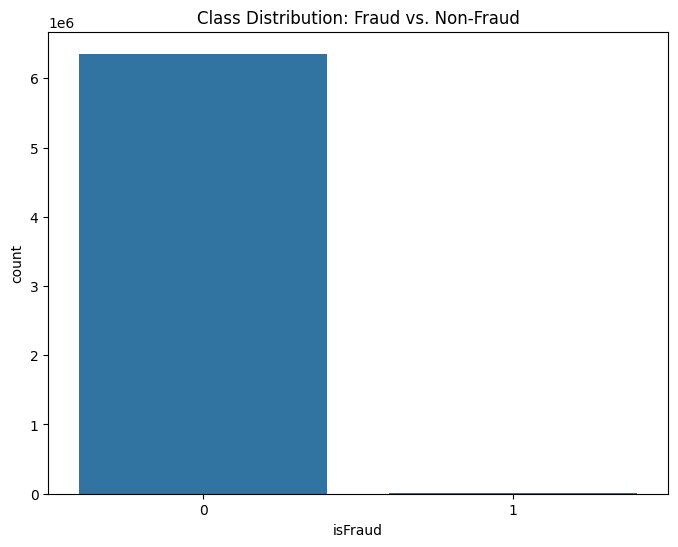

In [23]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution: Fraud vs. Non-Fraud')

### Transaction amount boxplot distribution

<Axes: xlabel='amount'>

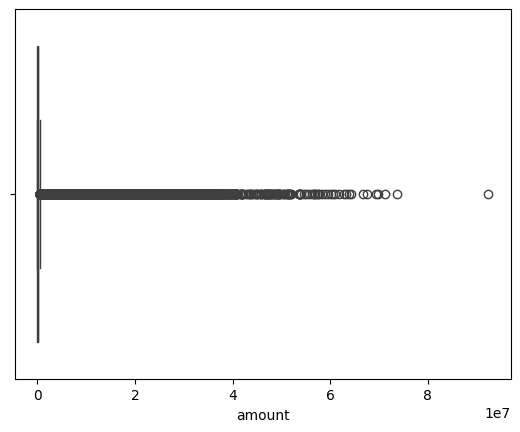

In [24]:
sns.boxplot(x=df['amount'])

### Transaction Amount Distribution

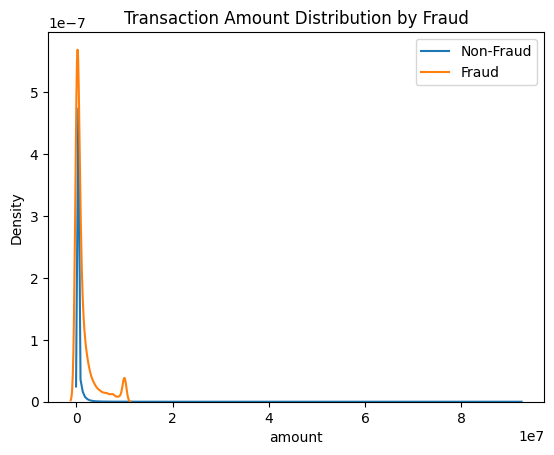

In [25]:
sns.kdeplot(data=df[df['isFraud'] == 0]['amount'], label='Non-Fraud')
sns.kdeplot(data=df[df['isFraud'] == 1]['amount'], label='Fraud')
plt.title('Transaction Amount Distribution by Fraud')
plt.legend()
plt.show()

- most of legit transactions' amounts are near 0 -> normal legit transaction is not usually a small amount of money
- while in fraud transactions, the amounts also show most of it small amount but there are another lower peak -> the fraud transactions most likely higher than legit

### newBalanceOrg vs isFraud

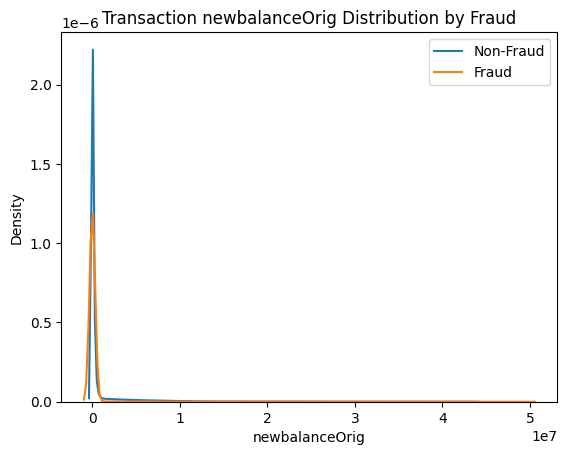

In [26]:
sns.kdeplot(data=df[df['isFraud'] == 0]['newbalanceOrig'], label='Non-Fraud')
sns.kdeplot(data=df[df['isFraud'] == 1]['newbalanceOrig'], label='Fraud')
plt.title('Transaction newbalanceOrig Distribution by Fraud')
plt.legend()
plt.show()

- cannot say anything becasue most of both fraud and nonfraud acount balance mostly 0 after transaction

### Distribution of Type on Fraud

In [27]:
typee = (df['type']).unique()
typee

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: xlabel='type', ylabel='count'>

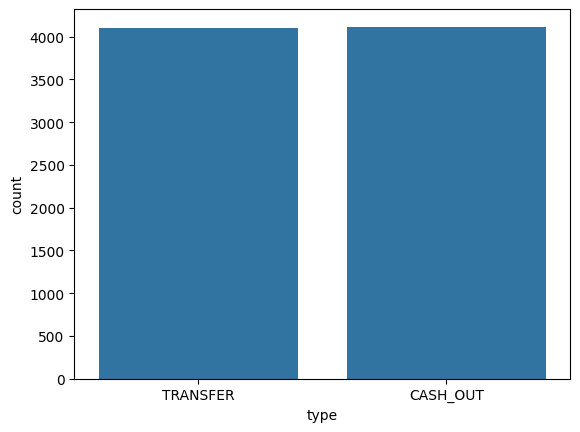

In [28]:
sns.countplot(data=df[df['isFraud'] == 1], x= 'type')

- only transfer and cash out transaction type distribute to fraud transactions
- pay-ment, credit and cash in transaction type does not distribute to fraud transactions

<Axes: xlabel='type', ylabel='count'>

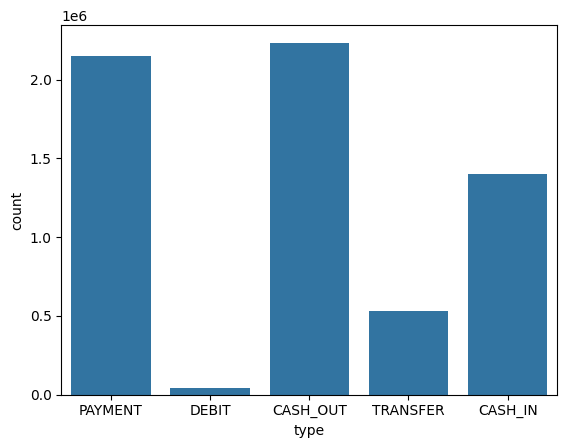

In [29]:
sns.countplot(data=df[df['isFraud'] == 0], x= 'type')

- most of the samples are payment, cash out and cash in, while debit is just a little

### Transaction ratio (amount/ org Old Balance) distribution

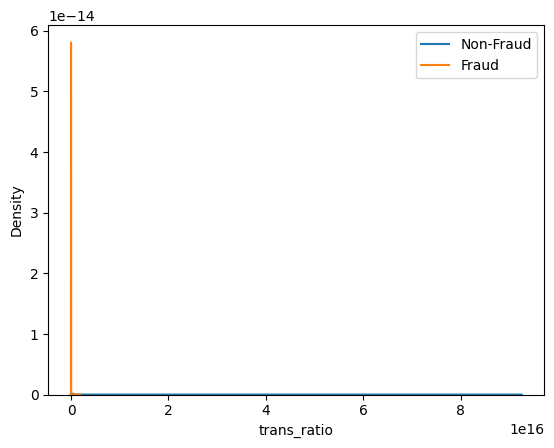

In [30]:
df['trans_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1e-9)  # Avoid division by zero

sns.kdeplot(data=df[df['isFraud'] == 0]['trans_ratio'], label='Non-Fraud')
sns.kdeplot(data=df[df['isFraud'] == 1]['trans_ratio'], label='Fraud')
plt.legend()

- The Fraud transactions (isFraud = 1) seem to have a strong density concentrated near 0 for the trans_ratio feature.
- The Non-Fraud transactions (isFraud = 0) show an extremely low density across the entire range.
- This suggests that for fraudulent transactions: The amount is very small relative to oldbalanceOrg

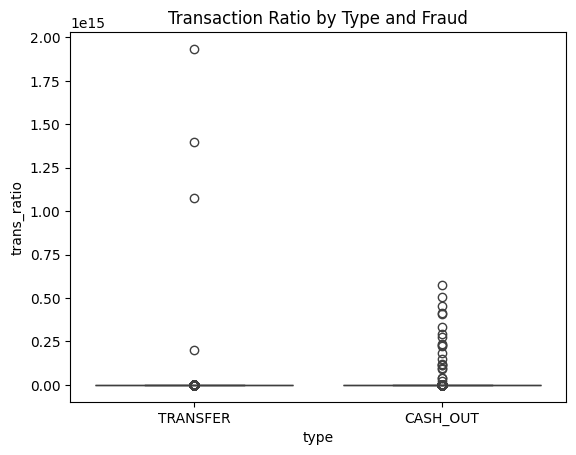

In [31]:
sns.boxplot(data=df[df['isFraud'] == 1], x='type', y='trans_ratio')
plt.title('Transaction Ratio by Type and Fraud')
plt.show()


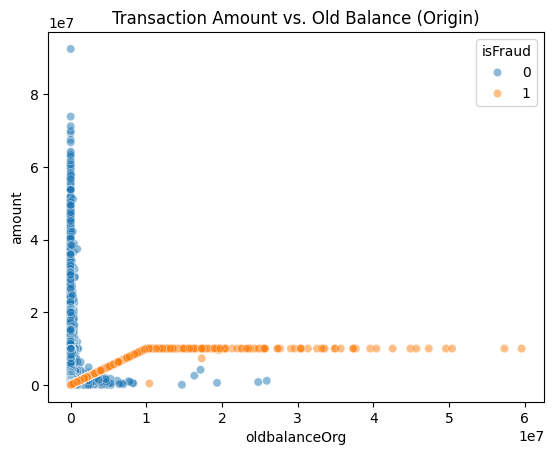

In [43]:
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=df[df['type'] == 'TRANSFER'], alpha=0.5)
plt.title('Transaction Amount vs. Old Balance (Origin)')
plt.show()


### let see if step effect the fraud

<Axes: xlabel='step'>

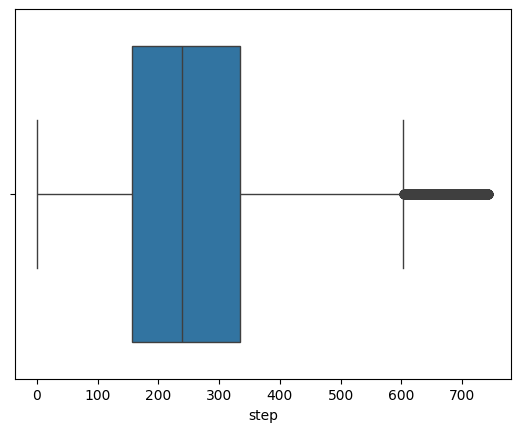

In [32]:
sns.boxplot(data=df, x='step')

<Axes: xlabel='step'>

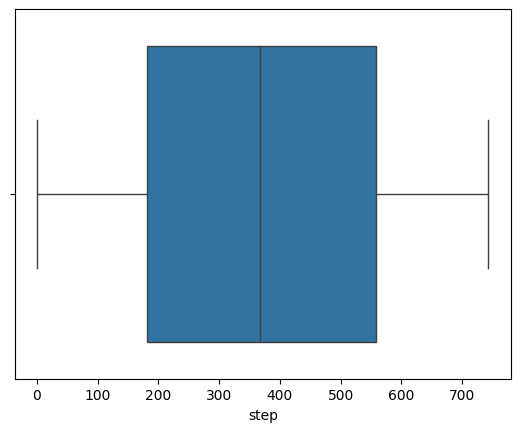

In [33]:
sns.boxplot(data=df[df['isFraud'] == 1], x='step')

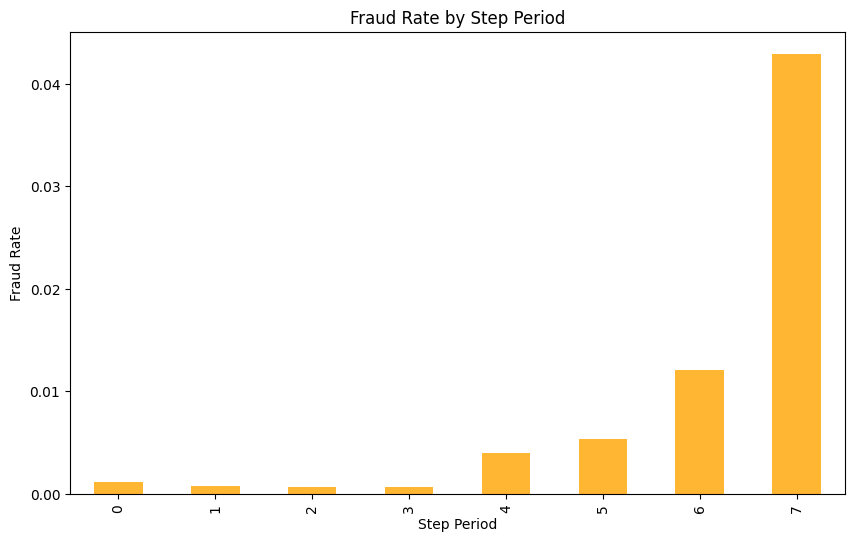

In [37]:
df['step_period'] = pd.cut(df['step'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800], labels=False)
step_counts = df.groupby('step_period')['isFraud'].count()
step_fraud_counts = df[df['isFraud'] == 1].groupby('step_period')['isFraud'].count()

# Normalize for proportion if needed
fraud_rate = step_fraud_counts / step_counts

# Bar plot for fraud rate across step_period
plt.figure(figsize=(10, 6))
fraud_rate.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Fraud Rate by Step Period')
plt.xlabel('Step Period')
plt.ylabel('Fraud Rate')
plt.show()

-> Fraudulent behavior seems to increase over time

## FEATURE ENGINEERING

In [35]:
nonfraud = df[df['isFraud'] == 0]
nonfraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,trans_ratio,step_period
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,0.057834,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,0.087735,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,0.280795,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,0.145149,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,0.038799,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,0.044646,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,1.506687,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,0.127943,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.0,157982.12,0,0,2.160121,0
11,1,PAYMENT,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,0.00,0,0,0.149245,0


In [36]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,trans_ratio,step_period
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.057834,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.087735,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1.000000,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1.000000,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.280795,0


### DELETE NON USEFUL FEATURE


In [40]:
#we will use step_period instead of step
df.drop(columns=['step', 'nameOrig', 'nameDest', 'trans_ratio'])

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_period
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0,7
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0,7
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,7
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0,7


In [45]:
df_error = df[df['amount'] > df['oldbalanceOrg']]
df_error

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,trans_ratio,step_period
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.00,0.00,0,0,1.506687,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.0,C997608398,10845.00,157982.12,0,0,2.160121,0
13,1,PAYMENT,11633.76,C1716932897,10127.0,0.0,M801569151,0.00,0.00,0,0,1.148786,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.00,51513.44,0,0,14.951644,0
16,1,PAYMENT,1563.82,C761750706,450.0,0.0,M1731217984,0.00,0.00,0,0,3.475156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.0,M675916850,0.00,0.00,0,0,85.242500,7
6362317,718,CASH_OUT,317177.48,C857156502,170.0,0.0,C784108220,345042.13,662219.61,0,0,1865.749882,7
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.0,C1818183087,0.00,159188.22,0,0,41.251158,7
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.0,C1515639522,24893.67,211167.51,0,0,1.108469,7


-> dataset error

### FEATURE ENCODING and SCALING